# Recursive feature elimination

Automatically created module for IPython interactive environment


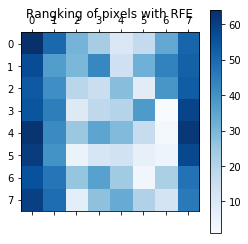

In [1]:
print(__doc__)

from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images),-1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel='linear',C = 1)
rfe = RFE(estimator = svc,n_features_to_select = 1,step=1)
rfe.fit(X,y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking,cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Rangking of pixels with RFE")
plt.show()

# SVM Margins Example

Automatically created module for IPython interactive environment
<class 'numpy.ndarray'>
[ 0.90230696  0.64821811] 0.902306958502 0.648218113611
<class 'numpy.ndarray'>
[ 0.42444912  0.37264753] 0.424449118271 0.372647528436


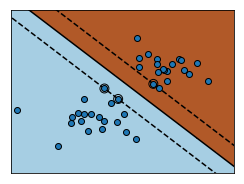

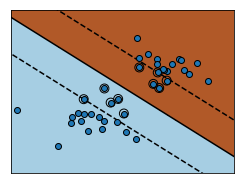

In [7]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

np.random.seed(0)
X = np.r_[np.random.randn(20,2)-[2,2],np.random.randn(20,2)+[2,2]]
Y = [0] * 20 + [1] * 20

fignum = 1

# fit the model
for name,penalty in(('unreg',1),('reg',0.05)):
    clf = svm.SVC(kernel='linear',C=penalty)
    clf.fit(X,Y)
    
    # get the separation hyperplane
    w = clf.coef_[0]
    print(type(w))
    print(w,w[0],w[1])
    a = -w[0] / w[1]
    xx = np.linspace(-5,5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    
    # plot the parallels to the separation hyperplane that pass through the 
    # support vectors (margin away from hyperplane indirection
    # perpendicular to hyperplane).This is sqrt(1+a^2) away vertically in 2-d
    #  ##!!!!没看懂是怎么来的
    margin = 1 /np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1+a**2)*margin
    yy_up = yy + np.sqrt(1 + a **2)*margin
    
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum,figsize=(4,3))
    plt.clf()
    plt.plot(xx,yy,'k-')
    plt.plot(xx,yy_down,'k--')
    plt.plot(xx,yy_up,'k--')
    
    plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=80,facecolors='none',zorder=10,edgecolors='k')
    plt.scatter(X[:,0],X[:,1],zorder=10,cmap=plt.cm.Paired,edgecolors='k')
    plt.axis('tight')
    x_min =-4.8
    x_max = 4.2
    y_min = -6
    y_max = 6
    
    XX,YY = np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(),YY.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum,figsize=(4,3))
    plt.pcolormesh(XX,YY,Z,cmap = plt.cm.Paired)
    
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

# SVM-Kernels

there are three different types of SVM-Kernels. The polynominal and RBF are expecially useful when the data-points are not linearly separable.

Automatically created module for IPython interactive environment


D:\Python-install\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)


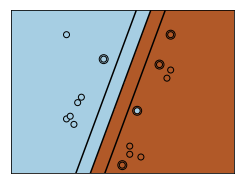

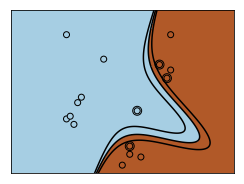

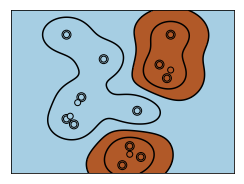

In [11]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# dataset and targets
X = np.c_[(.4,-.7),(-1.5,-1),(-1.4,-.9),(-1.3,-1.2),(-1.1,-.2),(-1.2,-.4),(-.5,1.2),(-1.5,2.1),(1,1),
         # --
         (1.3,.8),(1.2,.5),(.2,-2),(.5,-2.4),(.2,-2.3),(0,-2.7),(1.3,2.1)].T

Y = [0]*8 + [1]*8
# figure number 
fignum = 1

# fit the model
for kernel in('linear','poly','rbf'):
    clf = svm.SVC(kernel=kernel,gamma=2)
    clf.fit(X,Y)
    
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum,figsize=(4,3))
    plt.clf()
    
    plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=80,facecolors='none',zorder=10,edgecolors='k')
    plt.scatter(X[:,0],X[:,1],c=Y,zorder=10,cmap=plt.cm.Paired,edgecolors='k')
    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3
    
    XX,YY = np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(),YY.ravel()])
    
    # Put the result into a color plot
    Z =  Z.reshape(XX.shape)
    plt.figure(fignum,figsize=(4,3))
    plt.pcolormesh(XX,YY,Z>0,cmap=plt.cm.Paired)
    plt.contour(XX,YY,Z,colors=['k','k','k'],linestyle=['--','-','--'],levels=[-.5,0,.5])
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,x_max)
    
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

# SVM:Separating hyperplane for the unblanced classes

Find the optimal separating hyperplane using an SVC for classes that are unbalanced.
We first find the separating plane with a plain SVC and then plot (dashed) the separating hyperplane with automatically correction for unbalanced classes.

In [26]:
# 有错误 未解决！！

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs

# we create two clusters of random  points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0,0.0],[2.0,2.0]]
clusters_std = [1.5,0.5]
X,y = make_blobs(n_samples=[n_samples_1,n_samples_2],centers =centers,cluster_std = clusters_std,random_state=0,shuffle=False)


# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear',C=1.0)
clf.fit(X.y)

# fit the model and get the separating hyperplane  using weighted classes
wclf = svm.SVC(kernel='linear',class_weight={1:10})
wclf.fit(X,y)

# plot the samples
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired,edgecolors='k')

# plot the decision function for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)
YY,XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(),YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX,YY,Z,colors='r',levels=[0],alpha=0.5,linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.desision_function(xy).reshape(XX.shape)

# lpot decision boundary and margins for weighted classes
b = ax.contour(XX,YY,Z,colors='r',levels=[0],alpha=0.5,linestyles=['-'])
plt.legend([a.collections[0],b.collections[0]],['non weighted','weighted'],loc='upper right')
plt.show()

Automatically created module for IPython interactive environment


TypeError: unsupported operand type(s) for //: 'list' and 'int'

# SVM：Weighted samples

Plot decision function of a weighted dataset, where the size of points is proportional to its weight.

The sample weighting rescales the C parameter, which means that the classifier puts more emphasis on getting these points right. The effect might often be subtle. To emphasize the effect here, we particularly weight outliers, making the deformation of the decision boundary very visible.

Automatically created module for IPython interactive environment


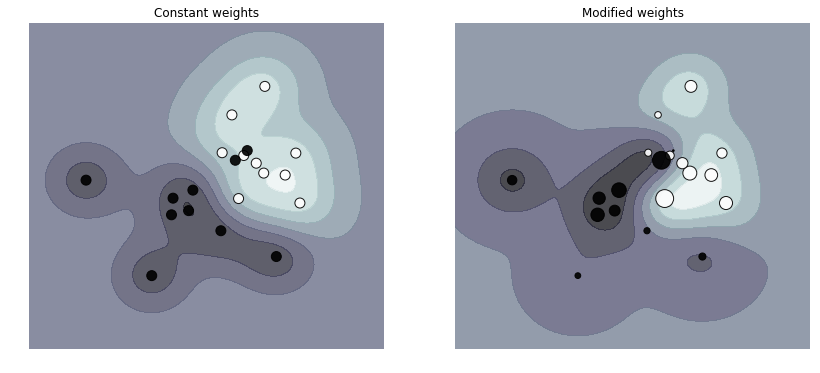

In [34]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def plot_decision_function(classifier,sample_weight,axis,title):
    # plot the decision function
    xx,yy = np.meshgrid(np.linspace(-4,5,500),np.linspace(-4,5,500))
    
    Z = classifier.decision_function(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot the line, the points, and the nearest vectors to plane
    axis.contourf(xx,yy,Z,alpha=0.75,cmap = plt.cm.bone)
    axis.scatter(X[:,0],X[:,1],c=y,s=100*sample_weight,alpha=0.9,cmap=plt.cm.bone,edgecolors='black')
    
    axis.axis('off')
    axis.set_title(title)

# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10,2)+[1,1],np.random.randn(10,2)]
y = [1]*10 + [-1]*10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# for reference, first fit without sample weights

# fit the model
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X,y,sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X,y)

fig,axes = plt.subplots(1,2,figsize=(14,6))
plot_decision_function(clf_no_weights,sample_weight_constant,axes[0],'Constant weights')
plot_decision_function(clf_weights,sample_weight_last_ten,axes[1],'Modified weights')

plt.show()

# SVM with custom kernel

Simple usage of Support Vector Machines to classify a sample. It will plot the decision surface and the support vectors.

Automatically created module for IPython interactive environment


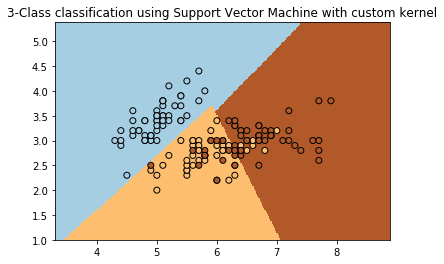

In [35]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,:2]
# we only take the first two features,
# We could avoid this ugly slicing by using a two-dim dataset
Y = iris.target

def my_kernel(X,Y):
    """
    we create a custom kernel:
                (2 0)
    k(X,Y) = X  (   ) Y.T
                (0 1)
    """
    M = np.array([[2,0],[0,1.0]])
    return np.dot(np.dot(X,M),Y.T)

h = .02 # step size in the mesh

# we create an instance of SVM and fit out data
clf = svm.SVC(kernel = my_kernel)
clf.fit(X,Y)

# Plot the decision boundary. For  that, we will assign a color to each
# point in the mesh [x_min,x_max] * [y_min,y_max]
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#Plot also the training points
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Paired,edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom kernel')
plt.axis('tight')
plt.show()

SVM:Maximum margin separating hyperplane

Automatically created module for IPython interactive environment
AxesSubplot(0.125,0.125;0.775x0.755)


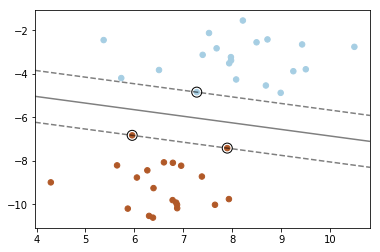

In [37]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create 40 separable points
X,y = make_blobs(n_samples=40,centers=2,random_state=6)

# fit the model, do not regularize for illustration purposes
clf = svm.SVC(kernel='linear',C= 1000)
clf.fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)
YY,XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(),YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100,linewidth=1,facecolors='none',edgecolors='k')
plt.show()
